# Name : Jung-Hyun Lee
# Student ID : 2018120206
# link : https://github.com/JungHyun-L/DataMining

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# generatePointCluster function

In [2]:
def generatePointCluster(pointCount) : # random하게 data point를 생성하는 함수
    np.random.seed(5)
    X = 2 * np.random.randn(pointCount, 1)
    Y = 2 * np.random.randn(pointCount, 1) 
    df=np.column_stack((X,Y))
    return (df)

# computeDistance function

In [3]:
def computeDistance(vecOne,vecTwo) : # 두 벡터간의 거리를 계산한다
    return np.sqrt(np.sum((vecOne-vecTwo)**2))

# initialiseLabel function

In [4]:
def initialiseLabel(clusterCount,pointCount,dataFrame) : # random하게 labeling을 한다
    np.random.choice(clusterCount,pointCount)
    label = np.random.choice(clusterCount,pointCount)
    df=np.column_stack((dataFrame,label))
    return (df)

# computeCentroid function

In [5]:
def computeCentroid(dataFrame,clusterCount) : # 중심값을 계산하여 데이터 프레임으로 반환한다
    totalCentroid = np.zeros((1,3))
    for i in range(clusterCount):
        centroid=np.mean(dataFrame[dataFrame[:,2]==i],axis=0)
        recentroid = centroid.reshape(1,3)
        totalCentroid = np.vstack([totalCentroid,recentroid])
    totalCentroid = np.delete(totalCentroid,0,0)
    return (totalCentroid)


# assignLabel function

In [6]:
def assignLabel(dataFrame,centroid,clusterCount,pointCount) : # 각 클러스터의 중심값과의 거리를 계산하여 labeling을 한다
    for i in range(pointCount):
        minDist=999; minIndex=-1;distance=0;
        for k in range(clusterCount):
            distance=computeDistance(dataFrame[i:i+1,:2],centroid[k:k+1,:2])
            if distance<minDist:
                minDist=distance;minIndex=k
            dataFrame[i:i+1,2:3]=minIndex
    return (dataFrame)
        

# computeEnergy function

In [7]:
def computeEnergy(dataFrame,centroid,clusterCount) : # 각 중심값과의 거리 제곱 합으로 energy를 구한다
    energy=0;distance=0;
    for i in range(clusterCount):
        idxData=dataFrame[dataFrame[:,2]==i]
        rowCount=np.size(idxData,0)
        for k in range(rowCount):
            distance=computeDistance(idxData[k:k+1,:2],centroid[i:i+1,:2])
            energy+=np.square(distance) 
    return (energy)

# kmeansClustering function

In [8]:
def kmenasClustering(dataFrame,centroid,clusterCount,pointCount) : # 앞서 만든 함수들을 토대로 k-means clustering을 수행한다 
    i=1;finalEnergy=0;
    while True:
        print("%d 번째 에너지 출력: "%i)
        energy=computeEnergy(dataFrame,centroid,clusterCount)
        print(energy)
        if(energy<=finalEnergy): # 이전에 계산한 energy가 더 낮을 때까지 반복 수행
            break
        finalEnergy=energy
        dataFrame=assignLabel(dataFrame,centroid,clusterCount,pointCount)
        i+=1
    return (dataFrame)

# input data

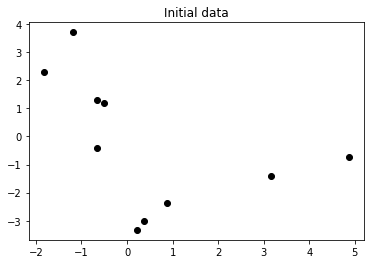

In [9]:
# cluster의 갯수는 3, data points는 10으로 설정
df=generatePointCluster(10)

plt.title('Initial data')
plt.plot(df[:,0], df[:,1],marker="o",color="black",linestyle = 'None')

# initial label

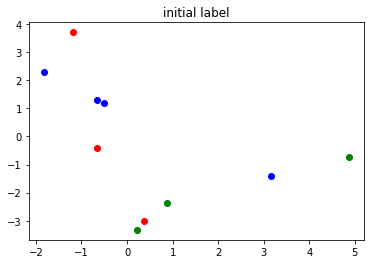

In [10]:
df=initialiseLabel(3,10,df)

plt.title('initial label')
for i in range(3):
    newDf=df[df[:,2]==i]
    plt.plot(newDf[:,0], newDf[:,1],marker="o",color="rbgkm"[i],linestyle = 'None')

# inital centroid

inital centroid
[[-0.48993572  0.09418329  0.        ]
 [ 0.04564331  0.84976554  1.        ]
 [ 1.98773901 -2.14425473  2.        ]]


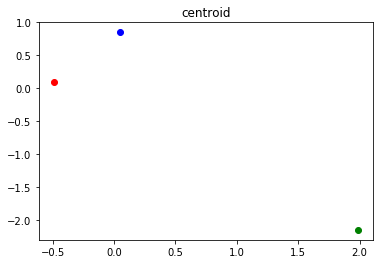

In [11]:
print("inital centroid")
centroid = computeCentroid(df,3)
print(centroid)

plt.title('centroid')
for i in range(3):
    newDf=centroid[centroid[:,2]==i]
    plt.plot(newDf[:,0], newDf[:,1],marker="o",color="rbgkm"[i],linestyle = 'None')

# k-means clustering(+energy per each iteration)

In [12]:
finalDf =  kmenasClustering(df,centroid,3,10)

1 번째 에너지 출력: 
61.940151990861416
2 번째 에너지 출력: 
38.12548759326581


# Final label

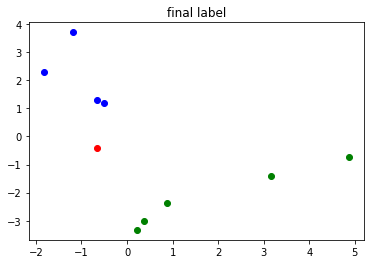

In [13]:
plt.title('final label')
for i in range(3):
    newDf=finalDf[finalDf[:,2]==i]
    plt.plot(newDf[:,0], newDf[:,1],marker="o",color="rbgkm"[i],linestyle = 'None')

# Final centroid

inital centroid
[[-0.6617403  -0.40975302  0.        ]
 [-1.04141558  2.12852057  1.        ]
 [ 1.90067714 -2.17109627  2.        ]]


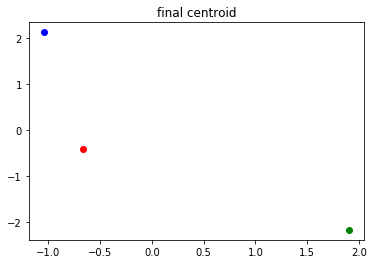

In [14]:
finalCentroid = computeCentroid(finalDf,3)

print("inital centroid")
print(finalCentroid)

plt.title('final centroid')
for i in range(3):
    newDf=finalCentroid[finalCentroid[:,2]==i]
    plt.plot(newDf[:,0], newDf[:,1],marker="o",color="rbgkm"[i],linestyle = 'None')